# First part: Comparison of classifiers on simulated data

In [1]:
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

The following are two useful functions for plotting a dataset (only training, or all data split into training and test) and the decision boundary of a model and the data

In [2]:
def plot_dataset(X_train, y_train, X_test=None, y_test=None):
    # -- function that plots the datapoints
    h = 0.02 # -- h is the step length
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # -- just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1,1,1)
    ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    
    if X_test is not None and y_test is not None:
        # -- Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2, edgecolors="k")
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

In [3]:
def plot_model(input_model, X_train, y_train, X_test, y_test):
    # -- function that plots the datapoints and decision boundaries of input_model
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # -- just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1, 1, 1)
    
    ax.set_title("Model decision boundary")
    # -- Plot the decision boundary. For that, we will assign a color to each
    # -- point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(input_model, "decision_function"):
        Z = input_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = input_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # -- Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

    # -- Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = "k")
    # -- Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, edgecolors = "k", alpha = 0.2)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

Let's generate an almost linearly separable dataset and run the perceptron first, than SVM, then a NN with default parameters

In [4]:
# -- generate a random n-classification dataset
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

# -- add noise to points exploiting a uniform distribution in order to get close to non-linear separability
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size = X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot the training dataset.

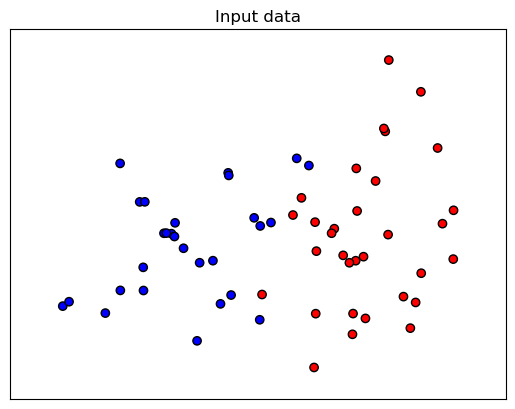

In [5]:
plot_dataset(X_train_scaled, y_train)

Let's now print all data (i.e., train and and test). The points in the test set are the most transparent that will be displayed.

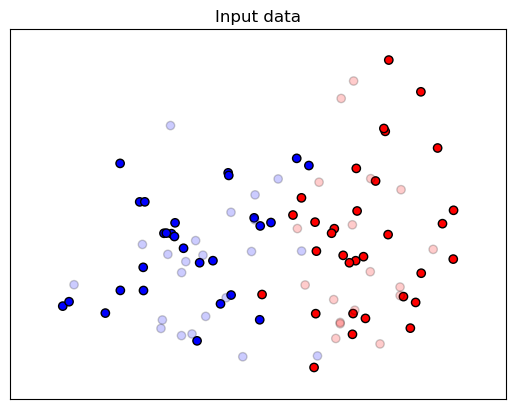

In [6]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Now let's learn a perceptron, plot its decision boundary, and print the train error and the test error.

Training error = 0.06666666666666665
Test error = 0.15000000000000002


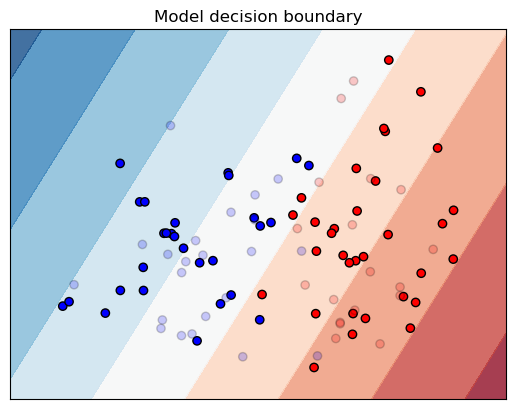

In [7]:
perceptron = Perceptron(random_state = 1213, tol=1e-4)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - perceptron.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - perceptron.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's do the same for SVM.

Training error = 0.050000000000000044
Test error = 0.050000000000000044


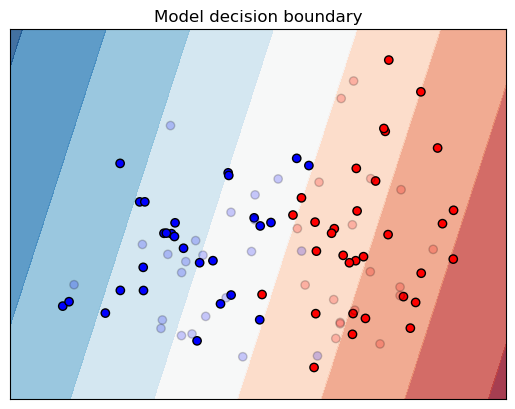

In [8]:
svm = SVC(kernel="linear", C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's try with a NN.

Training error = 0.01666666666666672
Test error = 0.050000000000000044


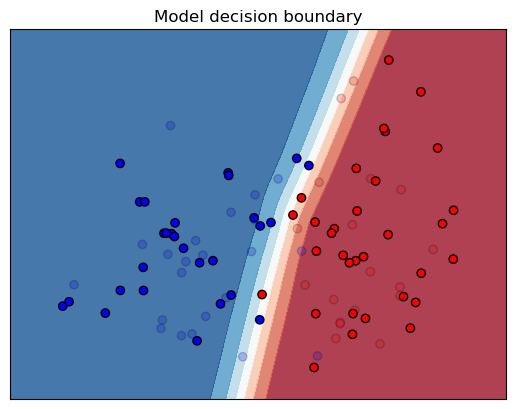

In [9]:
# The default activation function is the ReLU.
mlp = MLPClassifier(max_iter=1000) 
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - mlp.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - mlp.score(X_test_scaled, y_test)
print("Test error =", test_error)

Lets try with SVC + kernel function that is not linear.

Training error = 0.06666666666666665
Test error = 0.15000000000000002


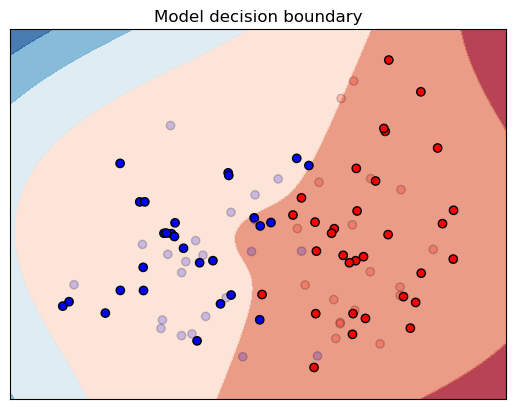

In [10]:
# Svm with polynomial kernel.
svm = SVC(kernel="poly", degree=3,C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

It doesn't perform very well even with polynomnial of degree 3.
Also if you increse the degree you get worst performance, try it.

Lets change the kernel funciton, for example using the sigmoid.

Training error = 0.08333333333333337
Test error = 0.15000000000000002


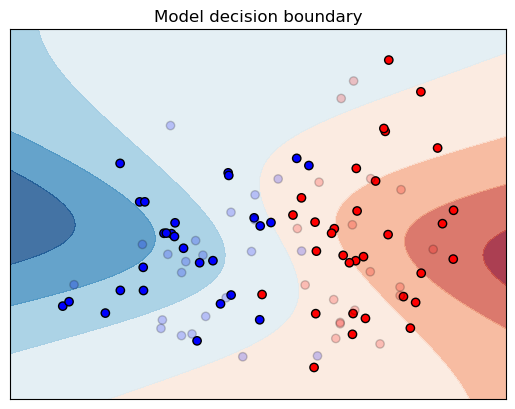

In [11]:
# Svm with sigmoid kernel.
svm = SVC(kernel="sigmoid", C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

Lets try with the Gaussian-radial basis kernel.

Training error = 0.033333333333333326
Test error = 0.050000000000000044


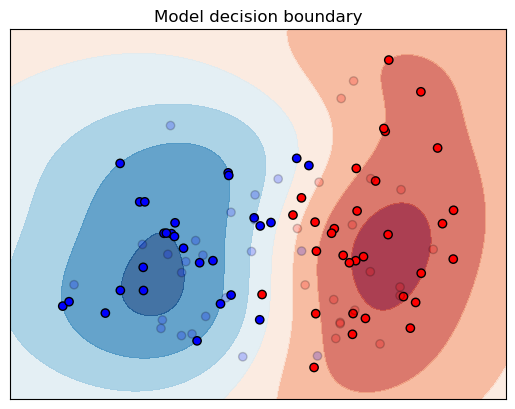

In [12]:
# Svm with RBF kernel.
svm = SVC(kernel="rbf", C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

With the RBF actually we get a result that is comparable with the NN.
The training error is higher for the SVM with RBF kernel, but the test error is the same.

---

Let's try now with some more complex dataset.

In [13]:
X, y = make_moons(noise = 0.3, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot the training data.

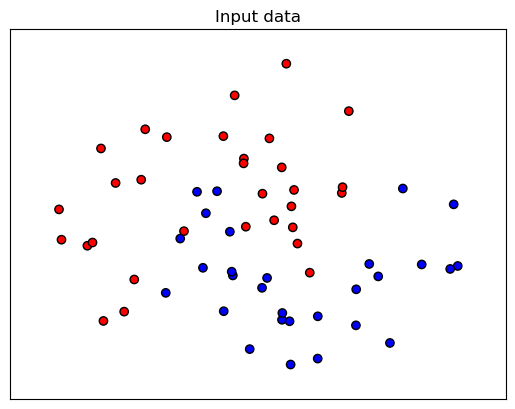

In [14]:
plot_dataset(X_train_scaled, y_train)

Let's plot all the data.

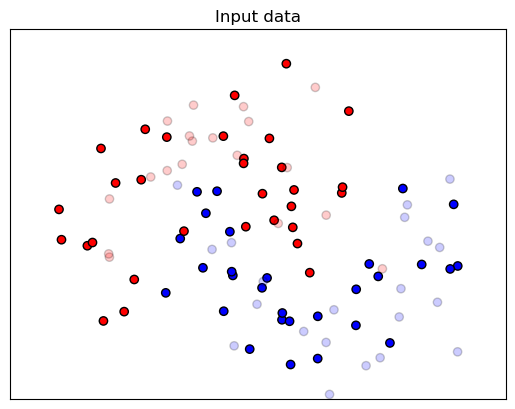

In [15]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Let's run the perceptron.

Training error = 0.18333333333333335
Test error = 0.07499999999999996


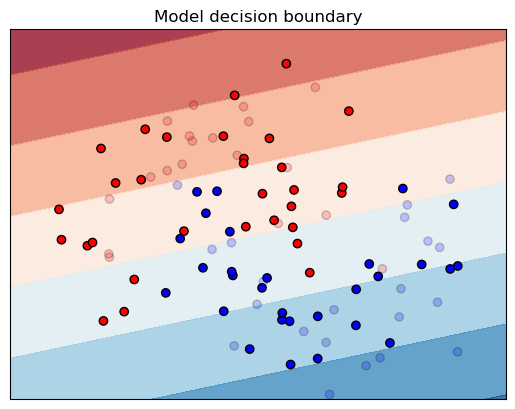

In [16]:
perceptron = Perceptron(random_state = 1213, tol=1e-4)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - perceptron.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - perceptron.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's run the SVM.

Training error = 0.16666666666666663
Test error = 0.125


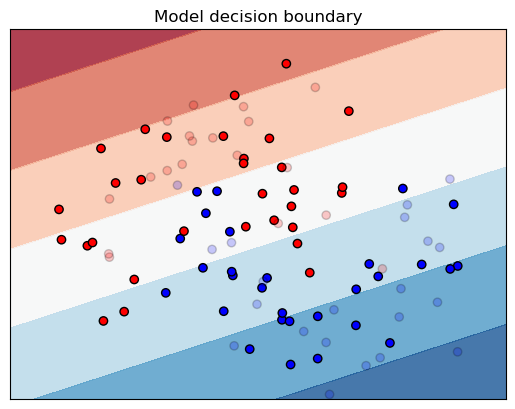

In [17]:
svm = SVC(kernel="linear", C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's try the NN.

Training error = 0.01666666666666672
Test error = 0.050000000000000044


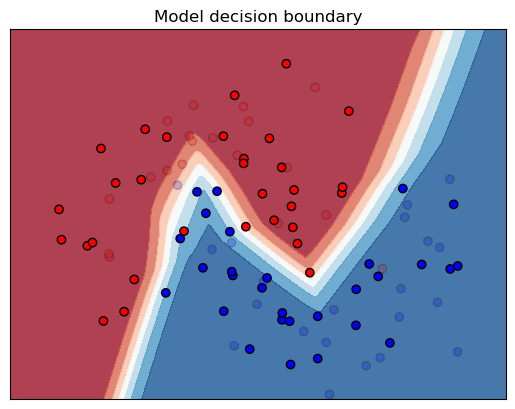

In [18]:
mlp = MLPClassifier(max_iter=1500)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - mlp.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - mlp.score(X_test_scaled, y_test)
print("Test error =", test_error)

The NN in this case outperform the SVM and the perceptron.
The NN are more powerful then SVM (with linear kernel) and the perceptron because they use non linear function.
From the documentation the default activation function for MLPClassifier is the ReLU so the comparison isn't that fair.

Lets try SVM with the RBF kernel function.

Training error = 0.08333333333333337
Test error = 0.050000000000000044


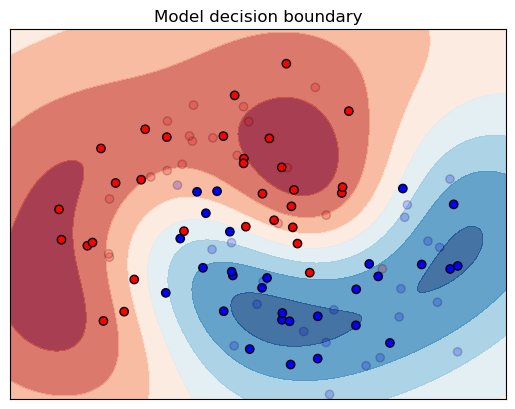

In [19]:
# Svm with RBF kernel.
svm = SVC(kernel="rbf", C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

---

Another interesting dataset

In [20]:
X, y = make_circles(noise = 0.2, factor = 0.5, random_state = 1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot the training data.

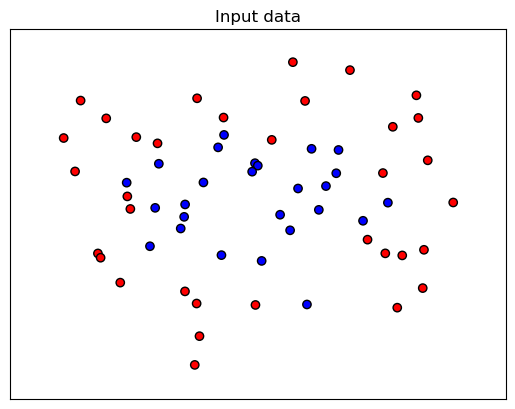

In [21]:
plot_dataset(X_train_scaled, y_train)

Let's plot all the data.

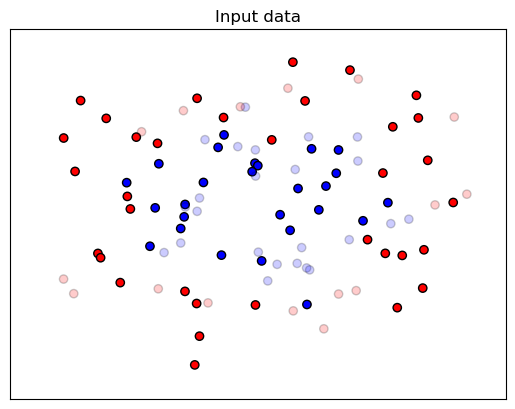

In [22]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Let's run the perceptron.

Training error = 0.4833333333333333
Test error = 0.475


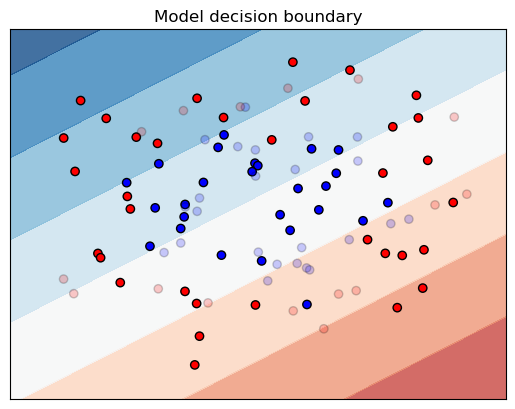

In [23]:
perceptron = Perceptron(random_state = 1213, tol=1e-4)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - perceptron.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - perceptron.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's run the SVM.

Training error = 0.43333333333333335
Test error = 0.6


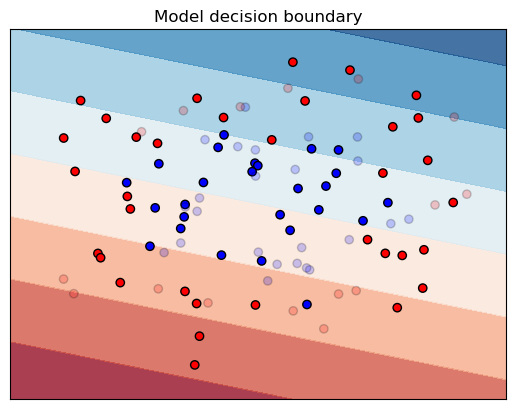

In [24]:
svm = SVC(kernel="linear", C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's run the NN.

Training error = 0.033333333333333326
Test error = 0.125


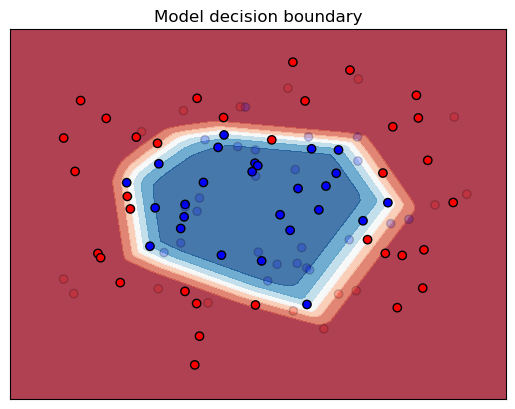

In [25]:
mlp = MLPClassifier(max_iter=1500)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - mlp.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - mlp.score(X_test_scaled, y_test)
print("Test error =", test_error)

Lets try with SVM with the RBF kernel function

Training error = 0.09999999999999998
Test error = 0.125


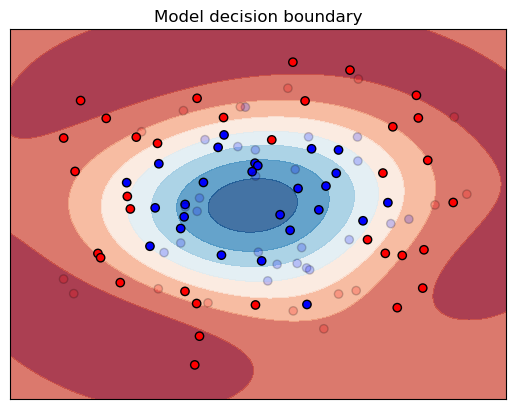

In [26]:
# Svm with RBF kernel.
svm = SVC(kernel="rbf", C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

---

Let's now consider the blobs dataset considered in the last Lab.

In [27]:
# -- make_blobs dataset

# -- generate the dataset
X, y = make_blobs(n_samples = 1000, centers = 2, n_features = 2, center_box=(-7.5, 7.5), random_state = 37, cluster_std = 2.8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# -- scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot all the data.

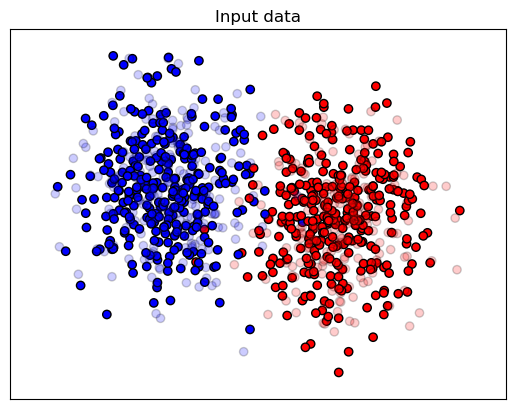

In [28]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Let's run the perceptron

Training error = 0.043333333333333335
Test error = 0.030000000000000027


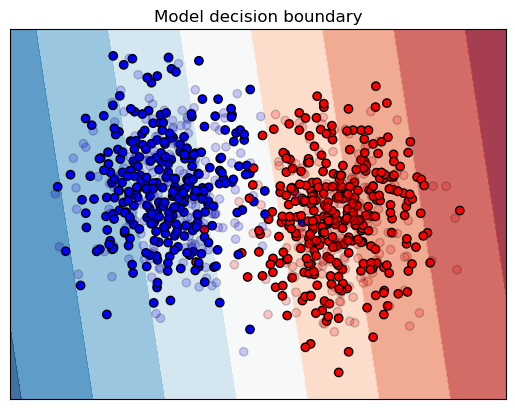

In [29]:
perceptron = Perceptron(random_state = 1213, tol=1e-4)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - perceptron.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - perceptron.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's run the SVM

Training error = 0.020000000000000018
Test error = 0.015000000000000013


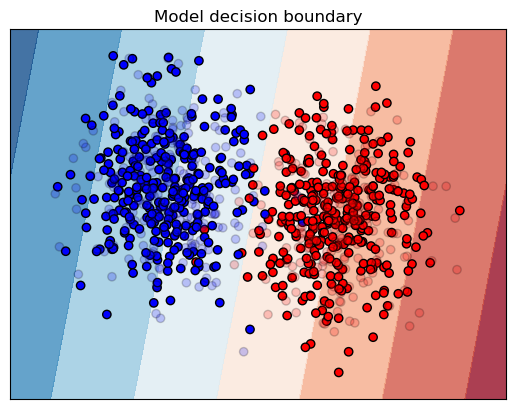

In [30]:
svm = SVC(kernel="linear", C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's run the NN

Training error = 0.020000000000000018
Test error = 0.015000000000000013


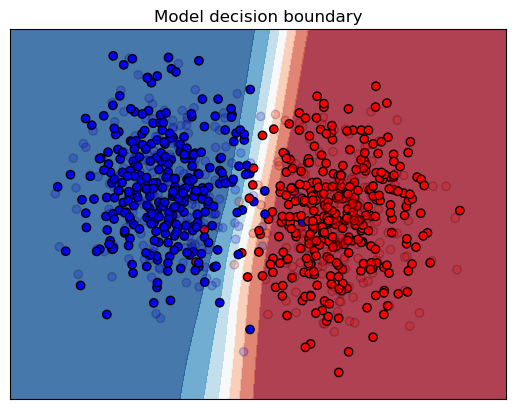

In [31]:
mlp = MLPClassifier(max_iter=1500)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - mlp.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - mlp.score(X_test_scaled, y_test)
print("Test error =", test_error)

Lets try with the SVM with the RBF kernel function.

Training error = 0.020000000000000018
Test error = 0.01749999999999996


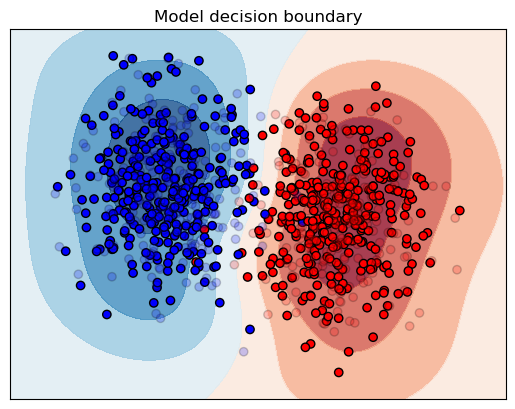

In [32]:
# Svm with RBF kernel.
svm = SVC(kernel="rbf", C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

Try also with the sigmoid kernel function.

Training error = 0.06833333333333336
Test error = 0.08250000000000002


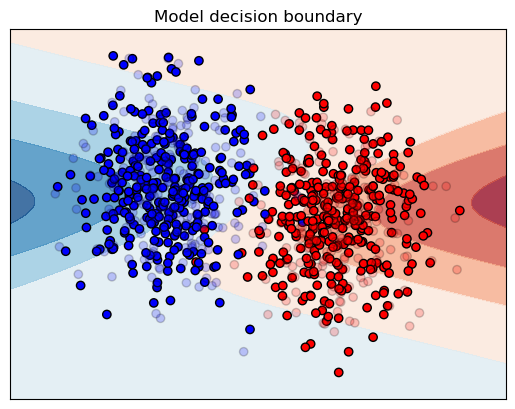

In [33]:
# Svm with sigmoid kernel.
svm = SVC(kernel="sigmoid", C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

For the final test we try also the polynomial funciton with degree 3, it should get good results in this specific dataset.

Training error = 0.020000000000000018
Test error = 0.015000000000000013


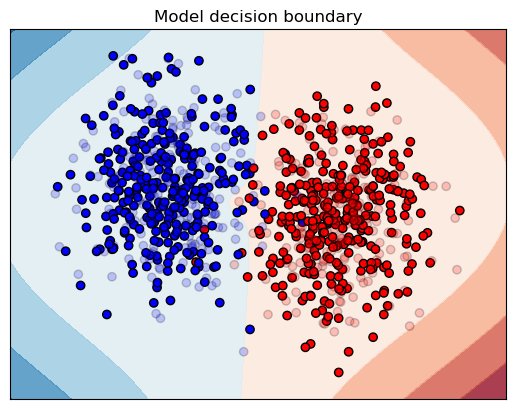

In [34]:
# Svm with polynomial of degree 3 kernel.
svm = SVC(kernel="poly", degree=3, C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

We get a very similar result to the one that we have obtained by using the NN with the ReLU function!

# Second part: Regression on House Pricing Dataset
We consider a reduced version of a dataset containing house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

https://www.kaggle.com/harlfoxem/housesalesprediction

For each house we know 18 house features (e.g., number of bedrooms, number of bathrooms, etc.) plus its price, that is what we would like to predict.

In [35]:
# -- put here your ID_Number  (numero di matricola)
numero_di_matricola = 1

In [36]:
#import all packages needed
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -- avoid convergence warnings from sklearn library
import warnings
warnings.filterwarnings("ignore")

Load the data, remove data samples/points with missing values (NaN) and take a look at them.

In [37]:
# -- load the dataset
df = pd.read_csv('kc_house_data.csv', sep = ',')
# -- remove the data samples with missing values (NaN)
df = df.dropna() 

# -- see features_explained.pdf (if you want)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.164000e+03,3.164000e+03,3164.000000,3164.000000,3164.000000,3.164000e+03,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,4.645240e+09,5.354358e+05,3.381163,2.071903,2070.027813,1.525054e+04,1.434893,0.009798,0.244311,3.459229,7.615676,1761.252212,308.775601,1967.489254,94.668774,98077.125158,47.557868,-122.212337,1982.544564,13176.302465
std,2.854203e+09,3.809004e+05,0.895472,0.768212,920.251879,4.254457e+04,0.507792,0.098513,0.776298,0.682592,1.166324,815.934864,458.977904,28.095275,424.439427,54.172937,0.140789,0.139577,686.256670,25413.180755
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,620.000000,660.000000
25%,2.199775e+09,3.150000e+05,3.000000,1.500000,1430.000000,5.453750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,98032.000000,47.459575,-122.324250,1480.000000,5429.500000
50%,4.027701e+09,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1545.000000,0.000000,1969.000000,0.000000,98059.000000,47.572500,-122.226000,1830.000000,7873.000000
75%,7.358175e+09,6.402500e+05,4.000000,2.500000,2500.000000,1.122250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,98117.000000,47.680250,-122.124000,2360.000000,10408.250000
max,9.839301e+09,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,425581.000000


Extract input and output data. We want to predict the price by using features other than id as input.

In [38]:
Data = df.values
# -- m = number of input samples
m = Data.shape[0]
print("Amount of data:",m)
Y = Data[:m, 2]
X = Data[:m, 3:]

Amount of data: 3164


## Data Pre-Processing

We split the data into 3 parts: one will be used for training and choosing the parameters, one for choosing among different models, and one for testing. The part for training and choosing the parameters will consist of $2/3$ of all samples, the one for choosing among different models will consist of $1/6$ of all samples, while the other part consists of the remaining $1/6$-th of all samples.

In [39]:
# -- Split data into train (2/3 of samples), validation (1/6 of samples), and test data (the rest)
m_train = int(2./3.*m)
m_val = int((m-m_train)/2.)
m_test = m - m_train - m_val
print("Amount of data for training and deciding parameters:", m_train)
print("Amount of data for validation (choosing among different models):", m_val)
print("Amount of data for test:", m_test)

from sklearn.model_selection import train_test_split

# Split into train_and_validation and test set.
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X, Y, test_size = m_test/m, random_state = numero_di_matricola)
# Split into train and validation set.
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, 
                                                  test_size = m_val/(m_train + m_val), random_state = numero_di_matricola)

Amount of data for training and deciding parameters: 2109
Amount of data for validation (choosing among different models): 527
Amount of data for test: 528


Let's standardize the data.

In [40]:
# -- Data pre-processing
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_train_and_val_scaled = scaler.transform(X_train_and_val)

## Neural Networks
Let's start by learning a simple neural network with 1 hidden node.
Note: we are going to use the input parameter solver='lbfgs' and random_state=numero_di_matricola to fix the random seed (so results are reproducible).

We hereby define a function to train an MLPRegressor on the (already scaled) training data and (optionally) print its parameters at the end of the training.

In [41]:
from sklearn.neural_network import MLPRegressor

def train_model(X_train, y_train, print_weights=True, **params):

    mlp_model = MLPRegressor(**params)
    mlp_model.fit(X_train_scaled, Y_train)

    # -- let's print the error (1 - R^2) on training data
    print(f'Training error: {(1.0 - mlp_model.score(X_train_scaled, Y_train)):.5f}')
    # -- let's print the error (1 - R^2) on validation data
    print(f'Validation error: {(1.0 - mlp_model.score(X_val_scaled, Y_val)):.5f}')

    if print_weights:

        weights = mlp_model.coefs_
        biases = mlp_model.intercepts_
    
        # -- let's print the coefficients of the model for the input nodes (but not the bias)
        print('\n--- Weights of NN ---')
    
        for i_layer, (w, b) in enumerate(zip(weights, biases)):
            print(f'\n# Layer {i_layer+1}')
            print(f'--- Weights, with shape {w.shape} ---')
            for i in range(w.shape[0]):
                for j in range(w.shape[1]):
                    print(f'w_({i+1}, {j+1})^({i_layer+1}): {w[i][j]:.3f}')
                    
            print(f'--- Biases, with shape {b.shape} ---')
            for i in range(b.shape[0]):
                print(f'b_{i+1}: {b[i]:.3f}')

In [42]:
# -- let's define the model
# (1, ) => we use 1 hideen layer of size 1. 
# In gerneral: The ith element represents the number of neurons in the ith hidden layer.
params = {'hidden_layer_sizes': (1, ), 
          'solver' : 'lbfgs', # Algorithm used, we can try also with the SGD.
          'random_state' : numero_di_matricola,
         }
train_model(X_train, y_train, **params)

Training error: 0.26395
Validation error: 0.30404

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): -213.590
w_(2, 1)^(1): 268.134
w_(3, 1)^(1): 521.526
w_(4, 1)^(1): -60.447
w_(5, 1)^(1): 4.010
w_(6, 1)^(1): 708.088
w_(7, 1)^(1): 293.308
w_(8, 1)^(1): 135.858
w_(9, 1)^(1): 812.846
w_(10, 1)^(1): 491.003
w_(11, 1)^(1): 163.021
w_(12, 1)^(1): -579.756
w_(13, 1)^(1): 37.848
w_(14, 1)^(1): -202.550
w_(15, 1)^(1): 597.748
w_(16, 1)^(1): -141.329
w_(17, 1)^(1): 146.448
w_(18, 1)^(1): -26.790
--- Biases, with shape (1,) ---
b_1: 3779.110

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): 141.699
--- Biases, with shape (1,) ---
b_1: -31.569


## Neural Networks vs Linear Models

Let's learn a linear model on the same data and compare the results with the simple NN above.

In [43]:
from sklearn import linear_model

LR = linear_model.LinearRegression()

LR.fit(X_train_scaled, Y_train)

# -- let's print the error (1 - R^2) on training data
print(f'Training error: {(1.0 - LR.score(X_train_scaled, Y_train)):.5f}')
# -- let's print the error (1 - R^2) on validation data
print(f'Validation error: {(1.0 - LR.score(X_val_scaled, Y_val)):.5f}')

print(f'\n--- Weights, with shape {LR.coef_.shape} ---\n{LR.coef_}')
print(f'\n--- Bias --- \n{LR.intercept_}')

Training error: 0.26536
Validation error: 0.31149

--- Weights, with shape (18,) ---
[-3.11272277e+04  3.58713682e+04  6.83900376e+16 -8.00003423e+03
  6.50837729e+02  1.00194786e+05  4.16702748e+04  1.94801424e+04
  1.11369329e+05 -6.14738710e+16 -3.38687690e+16 -7.82221897e+04
  6.53698840e+03 -2.81561017e+04  8.36906888e+04 -2.16140777e+04
  2.20558476e+04 -2.00693209e+03]

--- Bias --- 
536828.4713113868


Is there a way to make a NN network learn a linear model?
We can if we use the identity function as the activation function!

Let's first check what is the activation function used by MLPRegressor...

In [44]:
# -- let's write the code to learn a linear model with NN: how? 
# Simply choose the activation as the identity function!
params = {'hidden_layer_sizes': (1, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : "identity",
         }
train_model(X_train, y_train, **params)

Training error: 0.26536
Validation error: 0.31154

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): 51.551
w_(2, 1)^(1): -59.028
w_(3, 1)^(1): -122.969
w_(4, 1)^(1): 13.195
w_(5, 1)^(1): -1.107
w_(6, 1)^(1): -165.017
w_(7, 1)^(1): -68.625
w_(8, 1)^(1): -32.126
w_(9, 1)^(1): -183.340
w_(10, 1)^(1): -114.966
w_(11, 1)^(1): -38.516
w_(12, 1)^(1): 128.839
w_(13, 1)^(1): -10.762
w_(14, 1)^(1): 46.437
w_(15, 1)^(1): -137.839
w_(16, 1)^(1): 35.648
w_(17, 1)^(1): -36.322
w_(18, 1)^(1): 3.297
--- Biases, with shape (1,) ---
b_1: -883.447

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): -607.243
--- Biases, with shape (1,) ---
b_1: 365.292


Try to compute the the values of the bias in the NN and compare it to the one obtained in the perceptron
As we can see, the bias in the perceptron is $b_{per} \approx 536828$. Lets compute the value of the bias in the NN.
In order to do that we have to consider the struct of our NN (draw it):
We have
$$
    b_{nn} = b_1 \cdot w_{1,1}^{(2)} + b_2 = 883.447 \cdot 607.243 + 365.292 \approx 536832
$$
where $b_1$ is the weight of the arc that connects the note called "1" in the input, to the only node in the hidden layer; 
$b_2$ is the weight of the arc that connects the node called "1" in the hidden layer, to the only node in output;
$w_{1,1}^{(2)}$ is the weight of the arc that connects the only node in the hidden layer to the only
node in the output layer.

As we can see it's pretty much the same value.

But what about the coefficients of the model returned by the NN.
In this case is pretty simple to compute:
$$
\begin{split}
    h_{\pmb w}(\pmb x) & = (w_{1,1}^{(1)} x_1 + \ldots + w_{18, 1}^{(1)} x_{18} + b_1) \cdot w_{1,1}^{(2)} + b_2\\
                       & = (w_{1,1}^{(1)} x_1 + \ldots + w_{18, 1}^{(1)} x_{18}) \cdot w_{1,1}^{(2)} + \underbrace{(w_{1,1}^{(2)} \cdot b_1 +b_2)}_{b_{nn}}\\
                       & = b_{nn} + w_{1,1}^{(2)}\sum_{i=1}^{18} w_{i, 1} x_i 
\end{split}
$$
If we compute the weights of the model we can see that they has almost the same value of the one obtained using the Least Squares Algoritm!

---

Note that there is an $\ell_2$ regularization term in MLPRegressor. What about making it smaller?

In [45]:
# Try small number first.
params = {'hidden_layer_sizes': (1, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : 'identity', 
          'alpha' : 1e-20, # the regularization parameter
         }
train_model(X_train, y_train, **params)

Training error: 0.26536
Validation error: 0.31154

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): 51.551
w_(2, 1)^(1): -59.028
w_(3, 1)^(1): -122.969
w_(4, 1)^(1): 13.195
w_(5, 1)^(1): -1.107
w_(6, 1)^(1): -165.017
w_(7, 1)^(1): -68.625
w_(8, 1)^(1): -32.126
w_(9, 1)^(1): -183.340
w_(10, 1)^(1): -114.966
w_(11, 1)^(1): -38.516
w_(12, 1)^(1): 128.839
w_(13, 1)^(1): -10.762
w_(14, 1)^(1): 46.437
w_(15, 1)^(1): -137.839
w_(16, 1)^(1): 35.648
w_(17, 1)^(1): -36.322
w_(18, 1)^(1): 3.297
--- Biases, with shape (1,) ---
b_1: -883.447

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): -607.243
--- Biases, with shape (1,) ---
b_1: 365.292


In [46]:
# Try big number now.
params = {'hidden_layer_sizes': (1, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : 'identity', 
          'alpha' : 1e5, # the regularization parameter
         }
train_model(X_train, y_train, **params)

Training error: 0.26536
Validation error: 0.31151

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): 65.238
w_(2, 1)^(1): -74.748
w_(3, 1)^(1): -155.236
w_(4, 1)^(1): 16.692
w_(5, 1)^(1): -1.425
w_(6, 1)^(1): -208.924
w_(7, 1)^(1): -86.903
w_(8, 1)^(1): -40.688
w_(9, 1)^(1): -232.051
w_(10, 1)^(1): -145.952
w_(11, 1)^(1): -49.003
w_(12, 1)^(1): 163.073
w_(13, 1)^(1): -13.643
w_(14, 1)^(1): 58.771
w_(15, 1)^(1): -174.519
w_(16, 1)^(1): 45.146
w_(17, 1)^(1): -46.070
w_(18, 1)^(1): 4.178
--- Biases, with shape (1,) ---
b_1: -1118.703

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): -479.541
--- Biases, with shape (1,) ---
b_1: 365.699


In [47]:
# Try with a huge number now.
params = {'hidden_layer_sizes': (1, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : 'identity', 
          'alpha' : 1e10, # the regularization parameter
         }
train_model(X_train, y_train, **params)

Training error: 1.00000
Validation error: 1.00250

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): -0.000
w_(2, 1)^(1): 0.001
w_(3, 1)^(1): -0.000
w_(4, 1)^(1): -0.000
w_(5, 1)^(1): -0.001
w_(6, 1)^(1): 0.000
w_(7, 1)^(1): 0.000
w_(8, 1)^(1): 0.000
w_(9, 1)^(1): 0.000
w_(10, 1)^(1): 0.000
w_(11, 1)^(1): 0.000
w_(12, 1)^(1): -0.000
w_(13, 1)^(1): -0.000
w_(14, 1)^(1): 0.001
w_(15, 1)^(1): -0.000
w_(16, 1)^(1): 0.000
w_(17, 1)^(1): 0.000
w_(18, 1)^(1): 0.000
--- Biases, with shape (1,) ---
b_1: -35188.054

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): -0.000
--- Biases, with shape (1,) ---
b_1: 536817.700


## More Complex NNs

Let's try more complex NN, for example increasing the number of nodes in the only hidden layer, or increasing the number of hidden layers.

Let's build a NN with 2 nodes in the only hidden layer

In [48]:
# Now we use the ReLU as activation function!
params = {'hidden_layer_sizes': (2, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
         }
train_model(X_train, y_train, **params)

Training error: 0.18062
Validation error: 0.20720

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 2) ---
w_(1, 1)^(1): 90.945
w_(1, 2)^(1): -33.314
w_(2, 1)^(1): 120.455
w_(2, 2)^(1): 39.319
w_(3, 1)^(1): 85.737
w_(3, 2)^(1): 73.030
w_(4, 1)^(1): -260.973
w_(4, 2)^(1): 28.281
w_(5, 1)^(1): -30.616
w_(5, 2)^(1): 17.914
w_(6, 1)^(1): 198.112
w_(6, 2)^(1): 25.545
w_(7, 1)^(1): 34.846
w_(7, 2)^(1): 37.568
w_(8, 1)^(1): 96.993
w_(8, 2)^(1): 25.685
w_(9, 1)^(1): 312.521
w_(9, 2)^(1): 132.866
w_(10, 1)^(1): 85.005
w_(10, 2)^(1): 68.811
w_(11, 1)^(1): 19.232
w_(11, 2)^(1): 23.384
w_(12, 1)^(1): -217.475
w_(12, 2)^(1): -81.184
w_(13, 1)^(1): -3.512
w_(13, 2)^(1): 20.129
w_(14, 1)^(1): -301.265
w_(14, 2)^(1): -26.367
w_(15, 1)^(1): 305.572
w_(15, 2)^(1): 144.584
w_(16, 1)^(1): -463.750
w_(16, 2)^(1): -16.400
w_(17, 1)^(1): 194.495
w_(17, 2)^(1): 52.927
w_(18, 1)^(1): -251.281
w_(18, 2)^(1): -11.138
--- Biases, with shape (2,) ---
b_1: -1049.708
b_2: 897.619

# Layer 2
--- Weights,

Let's build a NN with 5 nodes in the only hidden layer

In [49]:
params = {'hidden_layer_sizes': (5, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
         }
train_model(X_train, y_train, **params)

Training error: 0.16223
Validation error: 0.21423

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 5) ---
w_(1, 1)^(1): -143.786
w_(1, 2)^(1): 144.076
w_(1, 3)^(1): 62.411
w_(1, 4)^(1): 147.958
w_(1, 5)^(1): -39.192
w_(2, 1)^(1): 273.486
w_(2, 2)^(1): 378.370
w_(2, 3)^(1): 167.467
w_(2, 4)^(1): 115.460
w_(2, 5)^(1): -2.818
w_(3, 1)^(1): -350.495
w_(3, 2)^(1): 297.287
w_(3, 3)^(1): 215.395
w_(3, 4)^(1): -275.550
w_(3, 5)^(1): 265.998
w_(4, 1)^(1): -132.570
w_(4, 2)^(1): -35.154
w_(4, 3)^(1): -676.136
w_(4, 4)^(1): 104.917
w_(4, 5)^(1): 64.977
w_(5, 1)^(1): 755.232
w_(5, 2)^(1): -819.816
w_(5, 3)^(1): 170.165
w_(5, 4)^(1): -60.939
w_(5, 5)^(1): -92.942
w_(6, 1)^(1): -356.826
w_(6, 2)^(1): 611.171
w_(6, 3)^(1): 473.666
w_(6, 4)^(1): -468.894
w_(6, 5)^(1): -75.463
w_(7, 1)^(1): -507.310
w_(7, 2)^(1): 575.967
w_(7, 3)^(1): -16.607
w_(7, 4)^(1): -407.675
w_(7, 5)^(1): 178.458
w_(8, 1)^(1): 96.421
w_(8, 2)^(1): 687.056
w_(8, 3)^(1): 113.721
w_(8, 4)^(1): -46.555
w_(8, 5)^(1): 27

Let's build a NN with 10 nodes in the only hidden layer

In [50]:
params = {'hidden_layer_sizes': (10, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
         }
train_model(X_train, y_train, **params, print_weights=False)

Training error: 0.12493
Validation error: 0.28489


Let's build a NN with 100 nodes in the only hidden layer. Note that this is the default!

In [51]:
params = {'hidden_layer_sizes': (100, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
         }
train_model(X_train, y_train, **params, print_weights=False)

Training error: 0.03110
Validation error: 0.42093


OVERFITTING!!
So if we increase the number of nodes we have this probem.

What about incrasing the number of hidden layers instead?

Let's try 2 layers, 1 node each

In [52]:
params = {'hidden_layer_sizes': (1,1, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
         }
train_model(X_train, y_train, **params)

Training error: 0.23832
Validation error: 0.27107

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): -36.147
w_(2, 1)^(1): 108.102
w_(3, 1)^(1): 185.844
w_(4, 1)^(1): -47.223
w_(5, 1)^(1): -15.299
w_(6, 1)^(1): 220.484
w_(7, 1)^(1): 85.452
w_(8, 1)^(1): 64.460
w_(9, 1)^(1): 336.840
w_(10, 1)^(1): 183.964
w_(11, 1)^(1): 42.487
w_(12, 1)^(1): -225.880
w_(13, 1)^(1): 12.135
w_(14, 1)^(1): -154.513
w_(15, 1)^(1): 312.556
w_(16, 1)^(1): -213.893
w_(17, 1)^(1): 104.174
w_(18, 1)^(1): -41.655
--- Biases, with shape (1,) ---
b_1: 223.951

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): 1.056
--- Biases, with shape (1,) ---
b_1: 745.986

# Layer 3
--- Weights, with shape (1, 1) ---
w_(1, 1)^(3): 433.445
--- Biases, with shape (1,) ---
b_1: 472.329


Let's try 2 layers, 2 nodes each

In [53]:
params = {'hidden_layer_sizes': (2,2, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
         }
train_model(X_train, y_train, **params)

Training error: 0.21305
Validation error: 0.27170

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 2) ---
w_(1, 1)^(1): -3.990
w_(1, 2)^(1): 2.184
w_(2, 1)^(1): 10.553
w_(2, 2)^(1): -9.287
w_(3, 1)^(1): 20.229
w_(3, 2)^(1): -28.836
w_(4, 1)^(1): -8.687
w_(4, 2)^(1): 16.948
w_(5, 1)^(1): -3.526
w_(5, 2)^(1): 15.462
w_(6, 1)^(1): 21.789
w_(6, 2)^(1): -21.732
w_(7, 1)^(1): 8.485
w_(7, 2)^(1): -9.641
w_(8, 1)^(1): 8.190
w_(8, 2)^(1): -12.303
w_(9, 1)^(1): 34.723
w_(9, 2)^(1): -39.772
w_(10, 1)^(1): 19.591
w_(10, 2)^(1): -27.252
w_(11, 1)^(1): 5.685
w_(11, 2)^(1): -7.948
w_(12, 1)^(1): -26.552
w_(12, 2)^(1): 39.393
w_(13, 1)^(1): 0.997
w_(13, 2)^(1): 2.417
w_(14, 1)^(1): -15.554
w_(14, 2)^(1): 26.552
w_(15, 1)^(1): 25.601
w_(15, 2)^(1): -14.147
w_(16, 1)^(1): -17.918
w_(16, 2)^(1): 29.948
w_(17, 1)^(1): 9.145
w_(17, 2)^(1): -6.889
w_(18, 1)^(1): -3.026
w_(18, 2)^(1): 8.708
--- Biases, with shape (2,) ---
b_1: 82.559
b_2: 75.981

# Layer 2
--- Weights, with shape (2, 2) ---
w_(

Try other architectures!

In [54]:
params = {'hidden_layer_sizes': (3, 3, 3, 1, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
         }
train_model(X_train, y_train, **params, print_weights=False)

Training error: 0.15508
Validation error: 0.23260


In [55]:
params = {'hidden_layer_sizes': (10, 5, 7, 8, 12, 14, 4, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
         }
train_model(X_train, y_train, **params, print_weights=False)

Training error: 0.05651
Validation error: 0.22462


---

How can we find the best architecture?
We can use the k-Folt Cross Validation!

### $k$-Fold Cross Validation - NN with ReLU as activation function.

Let's try 5-fold cross-validation with number of nodes in the hidden layer between 1 and 20. Note that we use train and validation data together, since we are doing cross-validation.

Note: you can also try to change the maximum amount of iterations to see what happens (see documentation for max_iter parameter)

In [56]:
from sklearn.model_selection import KFold
from itertools import product

def k_fold_cross_validation(X_train, Y_train, random_state, num_folds = 5):
    # -- grid of hyperparams
    param_grid = {'hidden_layer_sizes': [(i, ) for i in range(1, 21)],
                  'activation': ["relu"],
                  'solver': ["lbfgs"],
                  'random_state': [random_state],
                  'max_iter': [150, 175, 200],
                 }

    param_list = [
    {'hidden_layer_sizes': hls, 'activation': act, 'solver': solv, 'random_state': rs, 'max_iter': mit}
    for hls, act, solv, rs, mit in product(
        param_grid['hidden_layer_sizes'],
        param_grid['activation'],
        param_grid['solver'],
        param_grid['random_state'],
        param_grid['max_iter']
    )
    ]
    
    kf = KFold(n_splits = num_folds)
    err_validation_kfold = np.zeros(len(param_list),)
    err_training_kfold = np.zeros(len(param_list),)

    for i, params in enumerate(param_list):
        mlp_model = MLPRegressor(**params)
    
        print(f'#{i+1} Performing k-fold for params = {params}...')
        
        for train_index, validation_index in kf.split(X_train):
            X_train_kfold, X_val_kfold = X_train[train_index], X_train[validation_index]
            Y_train_kfold, Y_val_kfold = Y_train[train_index], Y_train[validation_index]
            
            # -- data scaling: standardize features with respect to the current folds
            scaler_kfold = preprocessing.StandardScaler().fit(X_train_kfold)
            X_train_kfold_scaled = scaler_kfold.transform(X_train_kfold)
            X_val_kfold_scaled = scaler_kfold.transform(X_val_kfold)
        
            # -- learn the model using the training data from the k-fold
            mlp_model.fit(X_train_kfold_scaled, Y_train_kfold)
            
            # -- incremental mean
            err_training_kfold[i] += (1.0 - mlp_model.score(X_train_kfold, Y_train_kfold))
            err_validation_kfold[i] += (1.0 - mlp_model.score(X_val_kfold_scaled, Y_val_kfold))
    
    
    # -- compute the mean
    err_training_kfold /= num_folds
    err_validation_kfold /= num_folds
    
    # -- choose the best paramter: the one that minimizes the (the estimation of the true) loss
    opt_params = param_list[np.argmin(err_validation_kfold)]
    print()
    print("Best parameters =", opt_params)
    print("Mimimum validation error =", np.min(err_validation_kfold))

    # Print model selection curve.
    # Let's plot the error as a function of the number of nodes in the hidden layer.
    plt.figure()
    err_train = err_training_kfold[::len(param_grid["max_iter"])]
    err_val = err_validation_kfold[::len(param_grid["max_iter"])]
    plt.plot(range(1, 21), err_train, color='r', marker='x', label="Train")
    plt.plot(range(1, 21), err_val, color='b', marker='x', label="Validation")
    # -- highlight min loss
    plt.scatter(opt_params["hidden_layer_sizes"], np.min(err_val), color='b', marker='o', linewidths=5, label=f"opt")
    plt.legend()
    plt.xlabel('# number of nodes in the hidden layer')
    plt.ylabel('Error')
    plt.title('Choice of # of nodes in the hidden layer')
    plt.xticks(range(1, 21))
    plt.show()
    plt.close()

    return opt_params

#1 Performing k-fold for params = {'hidden_layer_sizes': (1,), 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 150}...
#2 Performing k-fold for params = {'hidden_layer_sizes': (1,), 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 175}...
#3 Performing k-fold for params = {'hidden_layer_sizes': (1,), 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 200}...
#4 Performing k-fold for params = {'hidden_layer_sizes': (2,), 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 150}...
#5 Performing k-fold for params = {'hidden_layer_sizes': (2,), 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 175}...
#6 Performing k-fold for params = {'hidden_layer_sizes': (2,), 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 200}...
#7 Performing k-fold for params = {'hidden_layer_sizes': (3,), 'activation': 'relu', 'solver': 'lbfgs', 'random_state': 1, 'max_iter': 150}...

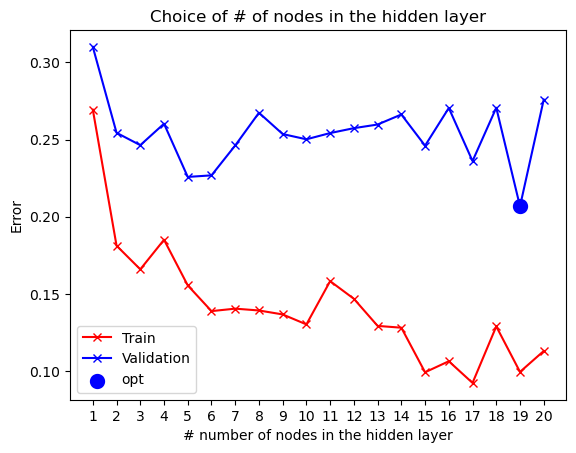

In [57]:
# -- obtain the best paramaters by running k_fold_cross_validation on training data
opt_params = k_fold_cross_validation(X_train_and_val_scaled, Y_train_and_val, numero_di_matricola)

In [58]:
# -- let's train the model with best_param on train and validation
opt_model = MLPRegressor(**opt_params)
opt_model.fit(X_train_and_val_scaled, Y_train_and_val)

# Compute the training error.
training_error = 1 - opt_model.score(X_train_and_val_scaled, Y_train_and_val)
print("Training error =", training_error)

# Compute the test error.
test_error = 1 - opt_model.score(X_test_scaled, Y_test)
print("Test error =", test_error)

Training error = 0.09365754998610643
Test error = 0.16681096411062812


### $k$-Fold Cross Validation - SVM with RBF as kernel function.
We need to use the SVR module from sklearn.
We want to choose the model with the best value of the C (=1/lambda) parameter.

In [59]:
from sklearn.svm import SVR

def k_fold_cross_validation(X_train, Y_train, random_state, num_folds = 5):
    
    c_grid = np.logspace(2, 6, num=20) # Grid for C parameter.
    
    kf = KFold(n_splits = num_folds)
    err_validation_kfold = np.zeros(len(c_grid),)
    err_training_kfold = np.zeros(len(c_grid),)

    for i, c in enumerate(c_grid):
        svm_model = SVR(kernel="rbf", C=c)
    
        print(f'#{i+1} Performing k-fold for C = {c}...')
        
        for train_index, validation_index in kf.split(X_train):
            X_train_kfold, X_val_kfold = X_train[train_index], X_train[validation_index]
            Y_train_kfold, Y_val_kfold = Y_train[train_index], Y_train[validation_index]
            
            # -- data scaling: standardize features with respect to the current folds
            scaler_kfold = preprocessing.StandardScaler().fit(X_train_kfold)
            X_train_kfold_scaled = scaler_kfold.transform(X_train_kfold)
            X_val_kfold_scaled = scaler_kfold.transform(X_val_kfold)
        
            # -- learn the model using the training data from the k-fold
            svm_model.fit(X_train_kfold_scaled, Y_train_kfold)
            
            # -- incremental mean
            err_training_kfold[i] += (1.0 - svm_model.score(X_train_kfold, Y_train_kfold))
            err_validation_kfold[i] += (1.0 - svm_model.score(X_val_kfold_scaled, Y_val_kfold))
    
    
    # -- compute the mean
    err_training_kfold /= num_folds
    err_validation_kfold /= num_folds
    
    # -- choose the best paramter: the one that minimizes the (the estimation of the true) loss
    opt_c = c_grid[np.argmin(err_validation_kfold)]
    print()
    print("Best parameters =", opt_c)
    print("Mimimum validation error =", np.min(err_validation_kfold))

    # Print model selection curve.
    # Let's plot the error as a function of the number of nodes in the hidden layer.
    plt.figure()
    plt.plot(c_grid, err_training_kfold, color='r', marker='x', label="Train")
    plt.plot(c_grid, err_validation_kfold, color='b', marker='x', label="Validation")
    # -- highlight min loss
    plt.scatter(opt_c, np.min(err_validation_kfold), color='b', marker='o', linewidths=5, label=f"opt")
    plt.legend()
    plt.xlabel('C')
    plt.ylabel('Error')
    plt.title('SVM: choice of C')
    plt.show()
    plt.close()

    return opt_c 

#1 Performing k-fold for C = 100.0...
#2 Performing k-fold for C = 162.3776739188721...
#3 Performing k-fold for C = 263.6650898730358...
#4 Performing k-fold for C = 428.13323987193957...
#5 Performing k-fold for C = 695.1927961775605...
#6 Performing k-fold for C = 1128.8378916846884...
#7 Performing k-fold for C = 1832.9807108324355...
#8 Performing k-fold for C = 2976.351441631319...
#9 Performing k-fold for C = 4832.930238571752...
#10 Performing k-fold for C = 7847.5997035146065...
#11 Performing k-fold for C = 12742.749857031322...
#12 Performing k-fold for C = 20691.3808111479...
#13 Performing k-fold for C = 33598.18286283781...
#14 Performing k-fold for C = 54555.947811685146...
#15 Performing k-fold for C = 88586.67904100832...
#16 Performing k-fold for C = 143844.9888287663...
#17 Performing k-fold for C = 233572.14690901214...
#18 Performing k-fold for C = 379269.01907322457...
#19 Performing k-fold for C = 615848.2110660254...
#20 Performing k-fold for C = 1000000.0...

B

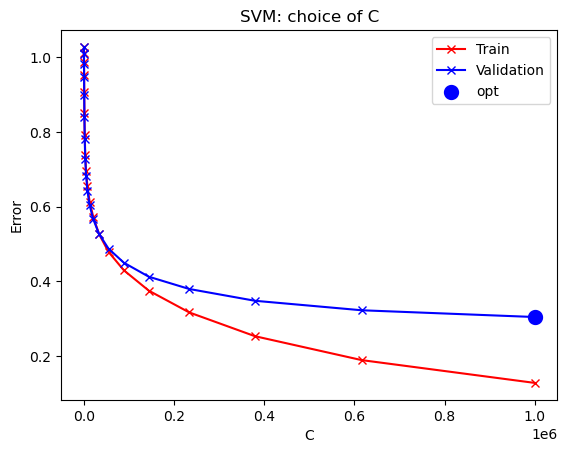

In [60]:
opt_c = k_fold_cross_validation(X_train_and_val_scaled, Y_train_and_val, numero_di_matricola)

In [61]:
# -- let's train the model with best_param on train and validation
opt_model = SVR(kernel="rbf", C=opt_c)
opt_model.fit(X_train_and_val_scaled, Y_train_and_val)

# Compute the training error.
training_error = 1 - opt_model.score(X_train_and_val_scaled, Y_train_and_val)
print("Training error =", training_error)

# Compute the test error.
test_error = 1 - opt_model.score(X_test_scaled, Y_test)
print("Test error =", test_error)

Training error = 0.1153459822380829
Test error = 0.38019884760749756


As we can see, the result is better if we use the NN with the ReLU as activaction function.